## MachineLearning 03

## The First Book KNN

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import random

In [4]:
random_data = np.random.random((20,2))

In [5]:
random_data

array([[0.90914123, 0.09080323],
       [0.89419814, 0.44032457],
       [0.5305005 , 0.06525381],
       [0.53402141, 0.01171654],
       [0.2788177 , 0.40987024],
       [0.67326817, 0.52233584],
       [0.55571746, 0.2325216 ],
       [0.1450706 , 0.61748041],
       [0.49494172, 0.51593027],
       [0.93014531, 0.86324465],
       [0.88383725, 0.3648449 ],
       [0.57049237, 0.61100435],
       [0.810794  , 0.89089988],
       [0.10027722, 0.48819729],
       [0.07559175, 0.74191454],
       [0.12965663, 0.84823332],
       [0.30725707, 0.41234467],
       [0.92717275, 0.85311547],
       [0.93165383, 0.09808192],
       [0.77766461, 0.3895399 ]])

In [6]:
import matplotlib.pyplot as plt

In [10]:
X = random_data[:, 0]

In [14]:
y = random_data[:, 1]

In [15]:
def assmuing_function(x):
    #日常
    #体重 -->高血压的概率
    #收入 -->买阿玛尼的概率
    #都是一种潜在的函数关系 + 一个随机变化
    return 13.4 * x + 5 + random.randint(-5,5)

In [16]:
y = [assmuing_function(x) for x in X]

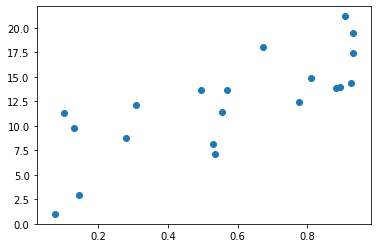

In [17]:
plt.scatter(X,y)

In [19]:
y

[21.182492482179896,
 13.982255119242406,
 8.108706679985858,
 7.155886858599658,
 8.736157243962115,
 18.02179344129958,
 11.446614002771,
 2.9439460992528366,
 13.632218985554431,
 17.463947109219575,
 13.843419201668603,
 13.644597807906868,
 14.86463956971821,
 11.343714700714251,
 1.0129294176040613,
 9.73739882616724,
 12.117244696152323,
 14.424114790882456,
 19.48416132987891,
 12.420705807055365]

## Regression -> Real Number 利用线性回归得到的线性函数来预测得到的值
## Classification -> [0,0,0,1],[0,1,0,0] 利用线性回归得到分界线，进行划分

In [20]:
y = np.array(y) 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [23]:
reg.score(X.reshape(-1,1),y)

0.5922121521778609

In [24]:
reg.coef_

array([12.62215198])

In [25]:
reg.intercept_

5.045715458246892

In [26]:
def f(x):
    return reg.coef_ * x + reg.intercept_

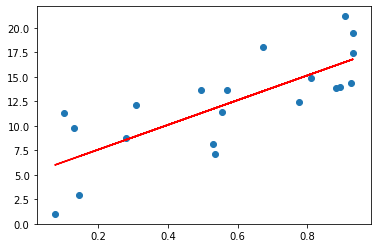

In [27]:
plt.scatter(x,y)
plt.plot(x,f(x),color='red')

In [28]:
x

array([0.90914123, 0.89419814, 0.5305005 , 0.53402141, 0.2788177 ,
       0.67326817, 0.55571746, 0.1450706 , 0.49494172, 0.93014531,
       0.88383725, 0.57049237, 0.810794  , 0.10027722, 0.07559175,
       0.12965663, 0.30725707, 0.92717275, 0.93165383, 0.77766461])

In [42]:
reg.predict([[0.7]])

array([13.88122185])

## How to implement a KNN model

In [37]:
def model(X,y):
    #KNN模型的原理为将新的输入与训练集进行匹配，选出离得最近的值进行预测，所以训练集只需要保存就ok
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [35]:
from scipy.spatial.distance import cosine

In [36]:
def distance(x1,x2):
    return cosine(x1,x2)

In [44]:
def predict(x,k=5):
    #在predict的时候，需要做大量的计算
    most_similars = sorted(model(X,y),key=lambda xi:distance(xi[0],x))[:k]
    #找到离的最近的一组值，返回其平均值
    
    y_hats = [_y for x,_y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [39]:
X,y

(array([0.90914123, 0.89419814, 0.5305005 , 0.53402141, 0.2788177 ,
        0.67326817, 0.55571746, 0.1450706 , 0.49494172, 0.93014531,
        0.88383725, 0.57049237, 0.810794  , 0.10027722, 0.07559175,
        0.12965663, 0.30725707, 0.92717275, 0.93165383, 0.77766461]),
 array([21.18249248, 13.98225512,  8.10870668,  7.15588686,  8.73615724,
        18.02179344, 11.446614  ,  2.9439461 , 13.63221899, 17.46394711,
        13.8434192 , 13.64459781, 14.86463957, 11.3437147 ,  1.01292942,
         9.73739883, 12.1172447 , 14.42411479, 19.48416133, 12.42070581]))

In [40]:
myself_knn = model(X,y)

In [45]:
predict(0.7)

[(0.5704923737243931, 13.644597807906868), (0.9091412300134252, 21.182492482179896), (0.8941981432270453, 13.982255119242406), (0.5305004985064073, 8.108706679985858), (0.5340214073581835, 7.155886858599658)]


12.814787789582937

## 重要的是原理的理解，以及能够将现实问题转化建模的能力，先解决有无的问题，再解决优化的问题

贝叶斯：适合数据前后有关联性的问题
线性回归：拟合一个函数满足变化趋势
决策树：
KNN；有明显群聚性的输出

## The Second Book决策树：确定重要特征，即找到权重高的因素，例如EF教育并不会关注穿的鞋子

## How to implement a Decision Tree

## 1.信息熵  表示信息的混乱程度，简单来说就是不确定性的情况越多，出现的概率越均等，信息熵越大


## 2.Gini 纯度

In [48]:
from collections import Counter
from icecream import ic

In [49]:
def entropy(elements):
    #群体的混乱程度
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)] #求得各取值时的概率
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [50]:
entropy([1,1,1,1])

ic| probs: [1.0]


-0.0

In [51]:
entropy([1,1,1,0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [52]:
entropy([2,3,3,4])

ic| probs: [0.25, 0.5, 0.25]


1.0397207708399179

In [53]:
entropy([1,2])

ic| probs: [0.5, 0.5]


0.6931471805599453

In [55]:
entropy([1,2,3,4])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

In [56]:
entropy([1,2,56,67])

ic| probs: [0.25, 0.25, 0.25, 0.25]


1.3862943611198906

In [57]:
entropy([1,2,3,4,5])

ic| probs: [0.2, 0.2, 0.2, 0.2, 0.2]


1.6094379124341005

## [1,2,3,4]是最乱的，信息熵是最大的

## 决策树怎么来决定，哪一个特征进行分割？

In [58]:
mock_data = {
    'gender':['F','F','F','F','M','M','M'],
    'income':['+10','-10','+10','+10','+10','+10','-10'],
    'family_number':[1,1,2,1,1,1,2],
    'pet':[1,1,1,0,0,0,1],
    'bought':[1,1,1,0,0,0,1],
}

In [59]:
import pandas as pd 

In [61]:
dataset = pd.DataFrame.from_dict(mock_data)

In [62]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


1.如果我们来了一个case
2.：：：[F,-10,2,1] -> ?

3.::: [F,+10,2,0] -> ?

In [64]:
#以性别进行划分：
print(entropy([1,1,1,0]) + entropy([0,0,1]))

#以收入进行划分：
print(entropy([1,1,0,0,0] + entropy([1,1])))

#以家庭成员数量进行划分：
print(entropy([1,1,0,0,0] + entropy([1,1])))

#以是否有宠物划分
print(entropy([1,1,1,1] + entropy([0,0,0])))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565
-0.0


## 决策树在进行决策时，先按照特征进行分割，依据最少原则进行选择

In [65]:
set(mock_data['family_number'])

{1, 2}

In [66]:
set(mock_data['gender'])

{'F', 'M'}

In [67]:
set(mock_data['income'])

{'+10', '-10'}

In [69]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [70]:
sub_split_1

[1, 1, 0, 0, 0]

In [72]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [73]:
sub_split_2

[1, 1]

In [74]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

在依据重要特征分割后，再继续寻找次要特征

In [78]:
splited_data = dataset[dataset['family_number'] == 1]

In [79]:
splited_data

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [80]:
splited_data[splited_data['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [81]:
splited_data[splited_data['income'] == '-10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


##  ==> 根据信息熵，我们得到了一个决策过程

第一步： 我们观察他的家庭成员：
      成员为2人，会购买，不是2人继续决策
第二步：我们观察他的收入情况，
      收入为“+10”，那么他有3/4的概率会勾买，如果时“-10”，他肯定不买

In [76]:
#在family_number=1的情况下继续对gender进行分割
entropy([1,1,0]) + entropy([0,0])

ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]


0.6365141682948128

In [77]:
#在family_number=1的情况下继续对income进行分割
entropy([1,0,0,0]) + entropy([1])

ic| probs: [0.75, 0.25]
ic| probs: [1.0]


0.5623351446188083

## 收入分割得到的信息熵小于以性别区分得到的值，所以选择以income分割，继续分割时得不到确定值

## The Third Book基于概率来做，则使用朴素贝叶斯分类

## The Fouth Book 基于神经网络的过程 由数据集训练出模型(由计算机拟合函数)，然后得到预测值

## 作为微信广告投放策划，1：首先确定投放模型 2: 如何衡量模型的好坏 3：需要搜集哪些信息
信息：性别,收入，年龄，兴趣，打开时间段，打开次数，点赞相关内容，转发的文章关键字，消费水平

## Evaluation is very important   制定合适的评价标准是非常重要的（广告点击率，购买转换率...）

## 所有的监督机器学习(训练集输入和输出是可以确定的)都可以分为两大类：1.classification(聚类，分类)  2.Regresssion(预测值)  

## How to evaluate？Evaluation Methods

### 1.Accuracy
### 2.Precision
### 3.Recall
### 3.5 F1 Score, F2 Score
### 4.Aoc/Auc
 MSE/Loss Function

## 判断是不是垃圾邮件，是的话输出1，不是输出0
## 给了10个数据，这10个数据的真实情况是 -> [1,1,1,1,0,1,1,0,1,1]
## F(x) -> [1,1,1,1,1,1,1,1,0,1] 这时Accuracy(预测的标签中正确值的个数/总预测个数) -> 6/10

## Precision： 所有说“是”的预测个数而且正确/所有说“是”的预测个数 -> 6/9

## Recall: 所有说“是”的预测且正确/所有真正是“是”的个数 -> 6/7

## Recall 和 Precision 其实往往是 tradeoff

## F1 Score = 2*precision*recall /(precision+recall)

## Aoc/Auc 数据分布不均时使用